# Used Bikes Prices in India

## Author- Adarsh Tiwari

### Aim-The aim to model a resale valuation for used bikes and predict the price of used bikes. This can be helpful while selling a used bike or buying a used bike.

### IMPORTING NECESSARY LIBRARIES AND READUNG THE DATAFRAME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
bikes=pd.read_csv('Used_Bikes.csv')

### EXPLORATORY DATA ANALYSIS

In [3]:
bikes.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
bikes.shape

(32648, 8)

#### The given dataset contains 8 features(columns) and 32648 entries(rows) which might contain some of the duplicate entries

In [5]:
#dropping the duplicate entries
bikes=bikes.drop_duplicates()

In [6]:
bikes.shape
#rechecking the shape after dropping duplicate values

(7324, 8)

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   object 
 1   price       7324 non-null   float64
 2   city        7324 non-null   object 
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   object 
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   object 
dtypes: float64(4), object(4)
memory usage: 515.0+ KB


#### Our dataframe has 7324 unique entries with 4 colums of float type and 4 of object type with no null values

In [8]:
#statistical data analysis 
bikes.describe()

,price,kms_driven,age,power
count,7.324000e+03,7324.000000,7324.000000,7324.000000
mean,8.488390e+04,23910.496587,6.656472,228.133397
std,1.209662e+05,27317.594631,3.605299,158.324219
min,4.400000e+03,1.000000,1.000000,100.000000
25%,3.000000e+04,10155.750000,4.000000,125.000000
50%,5.500000e+04,19000.000000,6.000000,160.000000
75%,1.000000e+05,30112.000000,8.000000,350.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [9]:
#columns or features of dataframe
bikes.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [10]:
bikes.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [11]:
#number of unique entries in every column
bikes.nunique()

bike_name      471
price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
dtype: int64

### Data Analysis

In [12]:
#sorting values in descending order
bikes['price'].sort_values(ascending=False )

367     1900000.0
4864    1800000.0
7671    1550000.0
6872    1500000.0
3016    1500000.0
          ...    
4923       6700.0
4922       6400.0
1382       5800.0
9194       5000.0
4960       4400.0
Name: price, Length: 7324, dtype: float64

#### The maximum price of bike is 19,00,000(19 lakhs) and minimum price is 4,400

In [13]:
#Names of bike who are old and yet expensive(more than 10 lakhs
bikes.loc[(bikes['price']>100000 )& (bikes['age']>15.0)][['bike_name','age','price']]

,bike_name,age,price
334,Royal Enfield Bullet 350 cc,39.0,125000.0
1278,Royal Enfield Bullet 350cc,18.0,130000.0
1976,Royal Enfield Standard 350cc,27.0,250000.0
2980,Royal Enfield‎ Bullet 350cc,43.0,135000.0
5216,Royal Enfield‎ Bullet 350cc,37.0,140000.0
5866,Royal Enfield‎ Bullet 350cc,39.0,115000.0
6685,Royal Enfield‎ Bullet 350cc,38.0,120000.0


#### These are some of the vintage bikes as they are more than 15 years old and yet they are expensive

In [14]:
#counting number of bikes of different brands
bikes['brand'].value_counts()

Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: brand, dtype: int64

#### Bajaj is the most common bike in india followed by Royal Enfield Hero and Honda 

In [15]:
#number of bikes in a particular city
bikes['city'].value_counts().head(10)

Delhi        1426
Bangalore     683
Mumbai        609
Gurgaon       474
Faridabad     463
Pune          394
Jaipur        299
Chennai       288
Ahmedabad     249
Ghaziabad     242
Name: city, dtype: int64

#### It seems Delhi has the maximum number of bike owners followed by Bangalore and Mumbai.
#### These are some of the most populous cities in INDIA which explains more number of owners

In [16]:
#expensive bikes count city wise
bikes[bikes['price']>1000000]['city'].value_counts()

Delhi         8
Mumbai        3
Pune          2
Chennai       1
Jaipur        1
Alibag        1
Ludhiana      1
Chandrapur    1
Gurgaon       1
Ghaziabad     1
Bangalore     1
Hyderabad     1
Hubli         1
Name: city, dtype: int64

#### Delhi has 8 bikes costing more than 10 lakhs followed by Mumbai Pune
#### It tells us that Delhi has more people who are financialy sound as they can afford bikes costing more than 10,00,000

In [17]:
#counting city with most old bikes
bikes[bikes['age']>10]['city'].value_counts().head(10)

Delhi        150
Bangalore     69
Gurgaon       67
Ahmedabad     54
Mumbai        53
Pune          52
Chennai       46
Faridabad     42
Ghaziabad     37
Noida         26
Name: city, dtype: int64

#### People in above cities like to keep their bikes for a longer duration of time (especially DELHI)

In [18]:
#city wise count of bikes with power more than 1000 
bikes[bikes['power']>1000][['power','city']].groupby('city').count()

,power
city,
Ahmedabad,2
Alibag,1
Bangalore,2
Chandrapur,1
Chennai,2
Coimbatore,2
Delhi,7
Ghaziabad,1
Gurgaon,1


In [19]:
#scaling price of bikes in hundred for better visualization
aa=bikes['price']/100
bikes['pricein100']=aa
bikes.drop('price',axis=1,inplace=True)


## DATA VISUALIZATION

<AxesSubplot:title={'center':'Number of owners of different types'}, xlabel='Type of owner', ylabel='Number of bikes'>

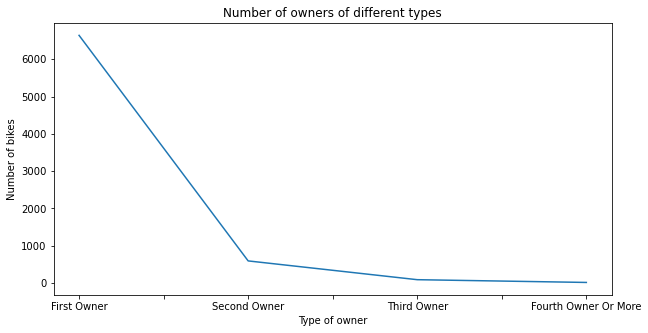

In [20]:
#Counting and plotting number of different types of owners
plt.title('Number of owners of different types')
plt.xlabel('Type of owner')
plt.ylabel('Number of bikes')
bikes['owner'].value_counts().plot.line(figsize=(10,5))

#### The above plot tells that most of the bikes are owned by first owner and almost negligible people are third and fourth owner

<AxesSubplot:title={'center':'kms driven by different owned bikes'}, xlabel='Type of owner', ylabel='Number of kms driven'>

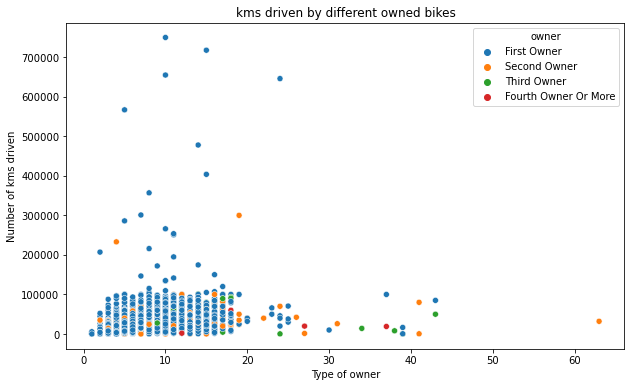

In [21]:
# kms driven vs age with differentiation of different owners
plt.figure(figsize=(10,6))
plt.title('kms driven by different owned bikes')
plt.xlabel('Type of owner')
plt.ylabel('Number of kms driven')
sns.scatterplot(x=bikes['age'],y=bikes['kms_driven'],hue=bikes['owner'])

#### Maximum number of kms driven are by the first owners and other owners bike haven't travelled much.

<AxesSubplot:>

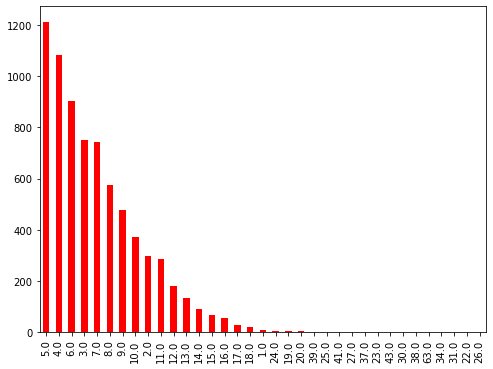

In [22]:
#plot for determining ages of bikes 
bikes['age'].value_counts().plot.bar(figsize=(8,6), color='red')

#### Above plot indicates most of the bikes are 3-10 years old which is the normal duration a bike lasts with an owner in INDIA

<AxesSubplot:xlabel='age', ylabel='pricein100'>

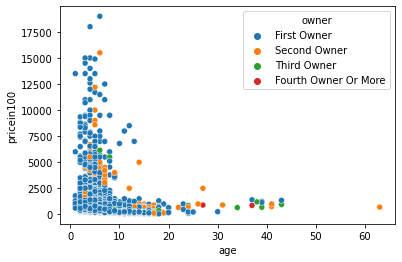

In [23]:
#Scatter plot of age vs price of Bikes in India
sns.scatterplot(x='age',y='pricein100',data=bikes,hue='owner')

<AxesSubplot:xlabel='kms_driven', ylabel='pricein100'>

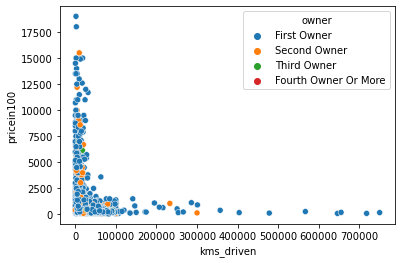

In [24]:
#Scatter plot of kms driven vs price of Bikes in India
sns.scatterplot(x='kms_driven',y='pricein100',data=bikes,hue='owner')

#### We analyze tha most expensive bikes are the new ones and their price decreses almost exponentially with age.
#### Expensive bikes travel less while cheap ones travel more.

<AxesSubplot:xlabel='age', ylabel='Density'>

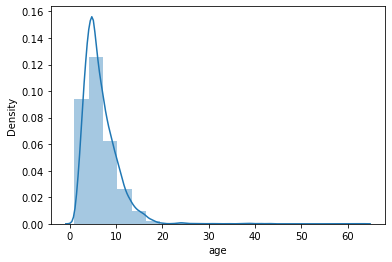

In [25]:
#plot to see distribution of bike with age
sns.distplot(bikes['age'],bins=20)

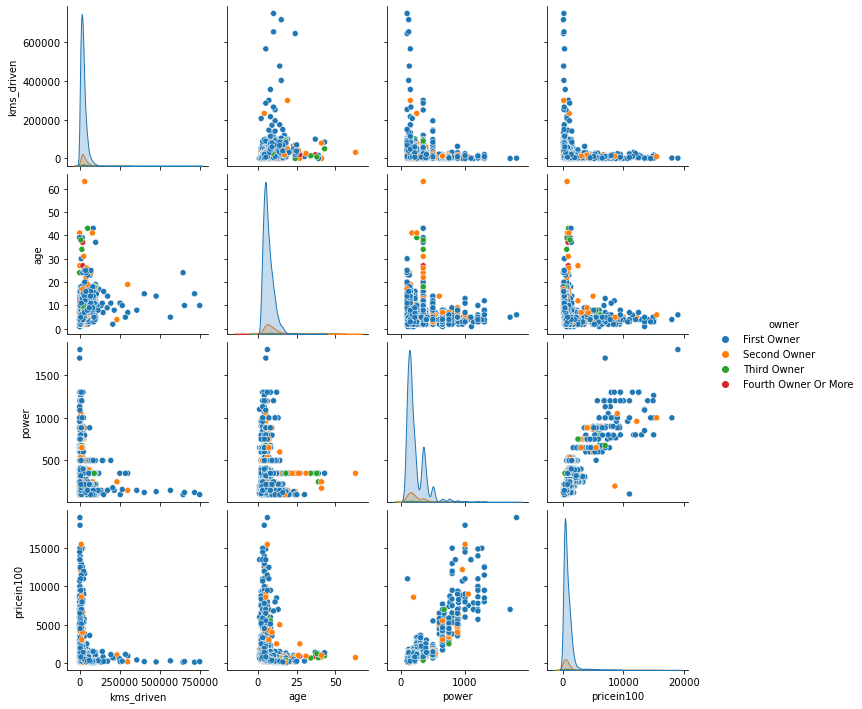

In [26]:
#plotting all the continuous features pair against each other using pairplot
sns.pairplot(bikes,hue='owner')

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN PRICE AND POWER')

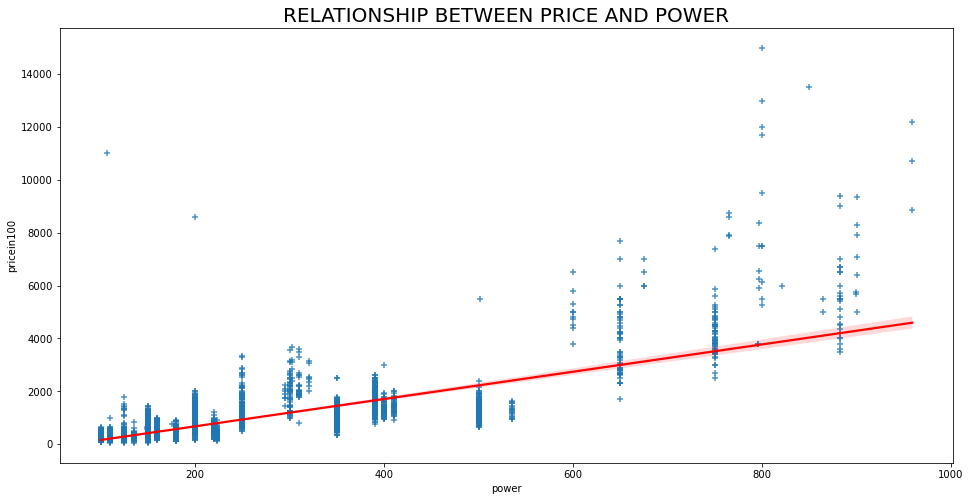

In [27]:
#plotting power vs price with restricting power to 1000 to avoid outliers
ss=bikes[bikes['power']<1000]
plt.figure(figsize=[16,8])
sns.regplot(ss['power'],ss['pricein100'],line_kws={"color": "red"},marker='+')
plt.title("RELATIONSHIP BETWEEN PRICE AND POWER",fontdict={'color':'black','fontsize':20})

[Text(0.5, 0, 'Power'), Text(0, 0.5, 'Price(in 100)')]

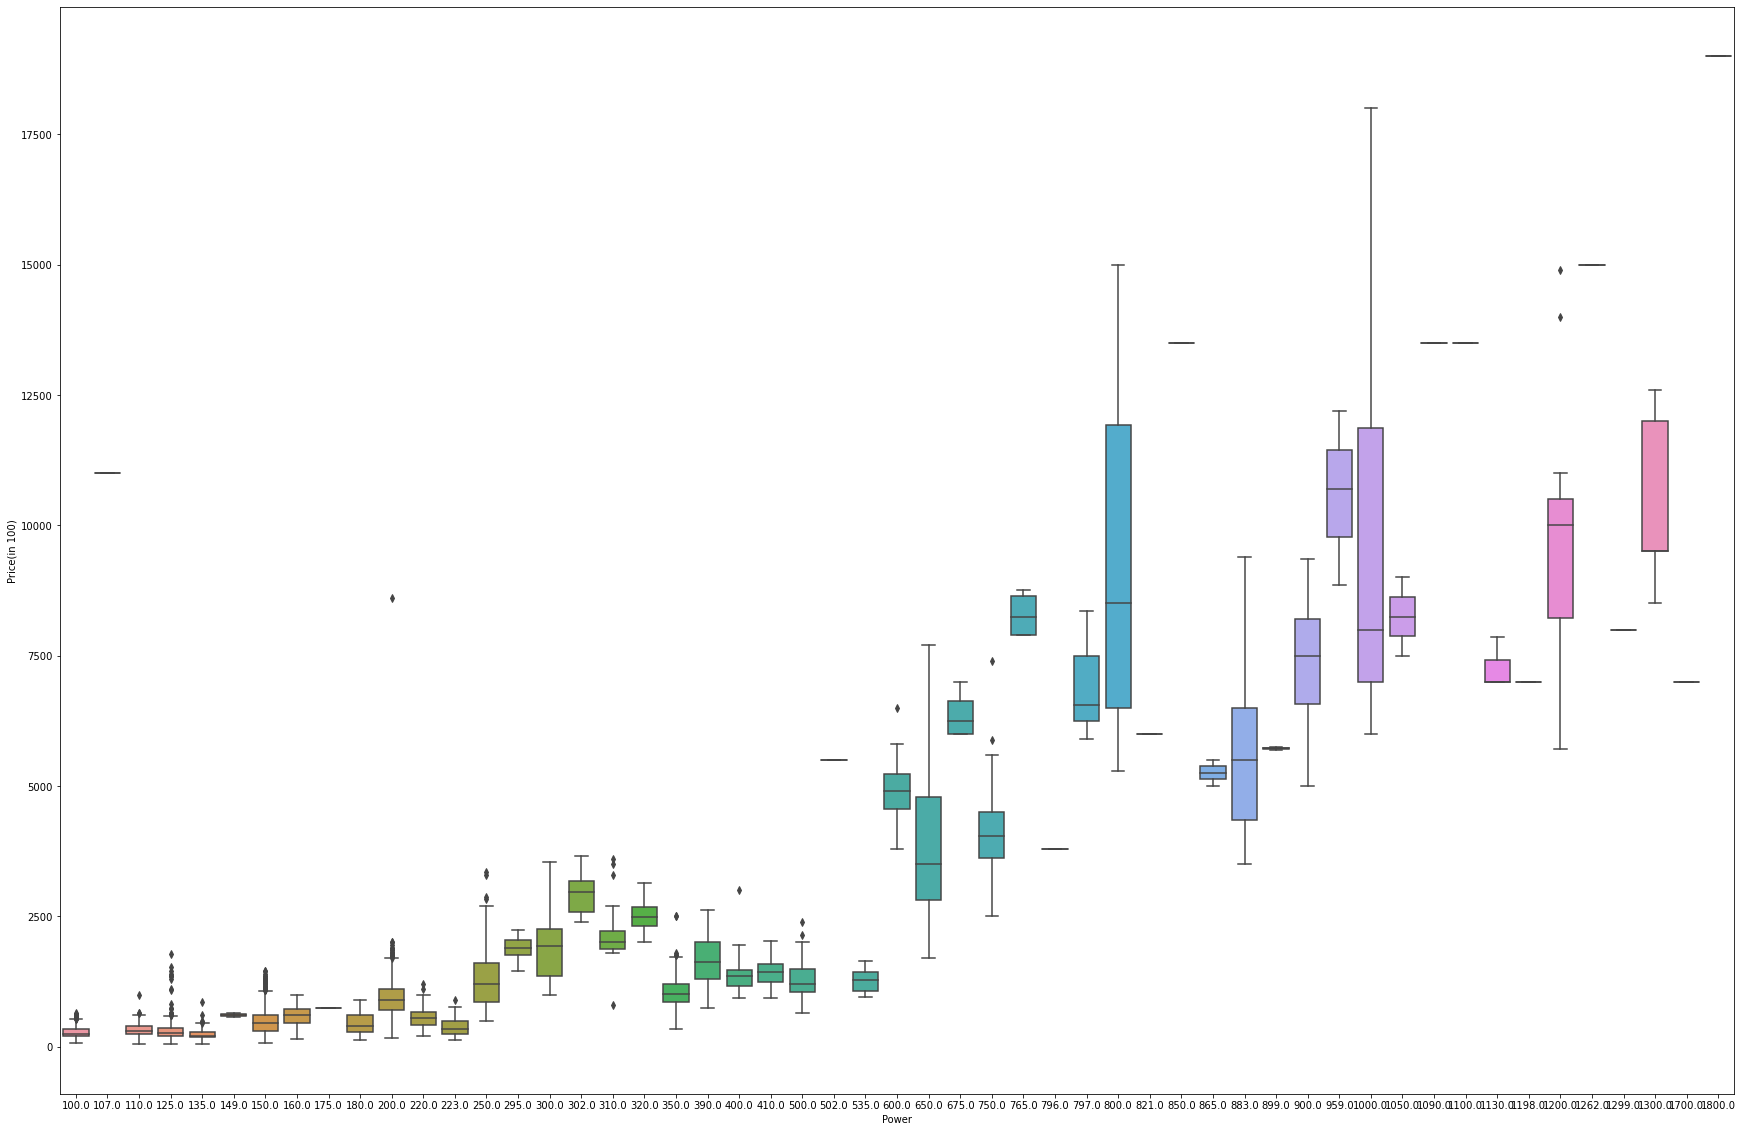

In [28]:
# boxplot of power vs price
plt.figure(figsize = (30,20))
sns.boxplot(x='power',y='pricein100',data=bikes).set(xlabel='Power',ylabel='Price(in 100)')

#### 1.Most bike range in power of 100-650 and price upto 2 lakhs
#### 2.There seems to be a linear relation between power and price
#### 3.Power and Price are directly proportional to each other

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN PRICE AND AGE')

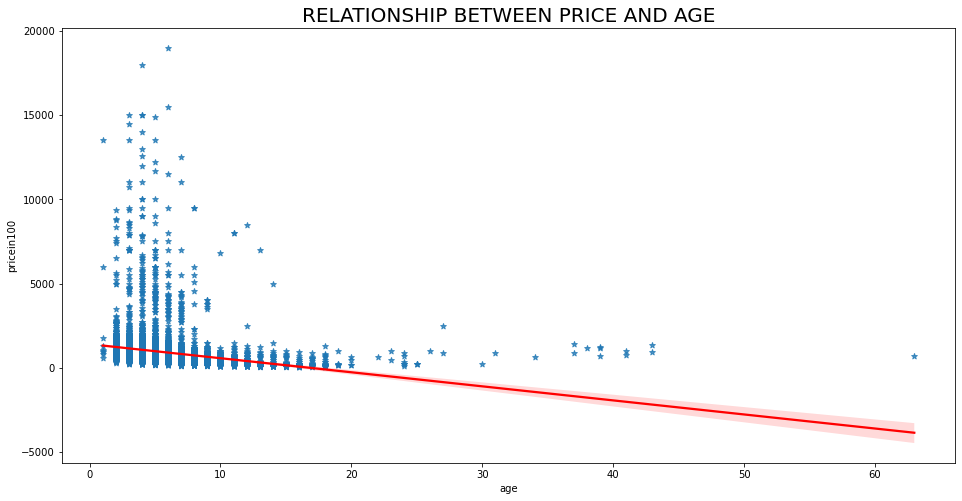

In [29]:
#regression plot of price vs age
plt.figure(figsize=[16,8])
sns.regplot(bikes['age'],bikes['pricein100'],line_kws={"color": "red"},marker='*')
plt.title("RELATIONSHIP BETWEEN PRICE AND AGE",fontdict={'color':'black','fontsize':20})

[Text(0.5, 0, 'Power'), Text(0, 0.5, 'Price(in 100)')]

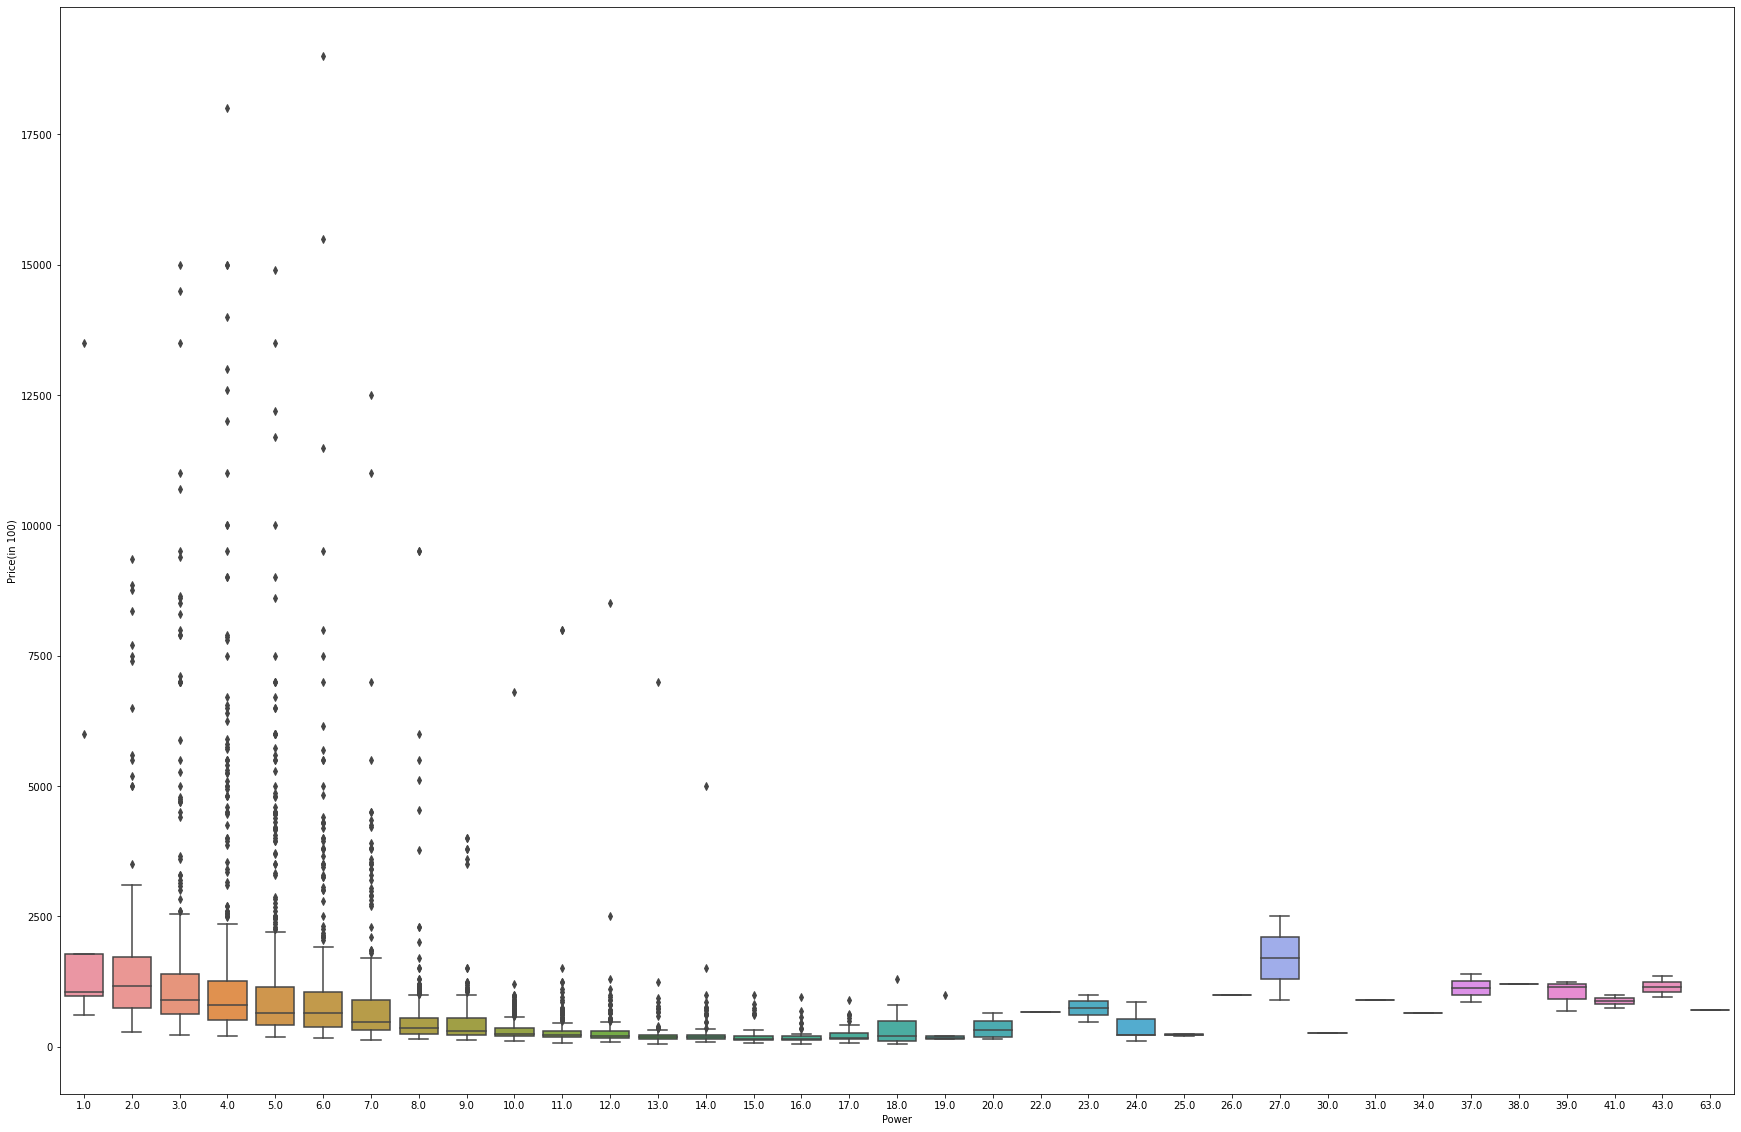

In [30]:
#box plot of price vs age
plt.figure(figsize = (30,20))
sns.boxplot(x='age',y='pricein100',data=bikes).set(xlabel='Power',ylabel='Price(in 100)')

#### 1. Most of the bikes are less than 10 years old.
#### 2. With incrase in age the price of bike decreases which indicate inverse relation between each other.
#### 3. The graph seems to have too many outliers(vintage bikes and sports bikes)

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN POWER and Age')

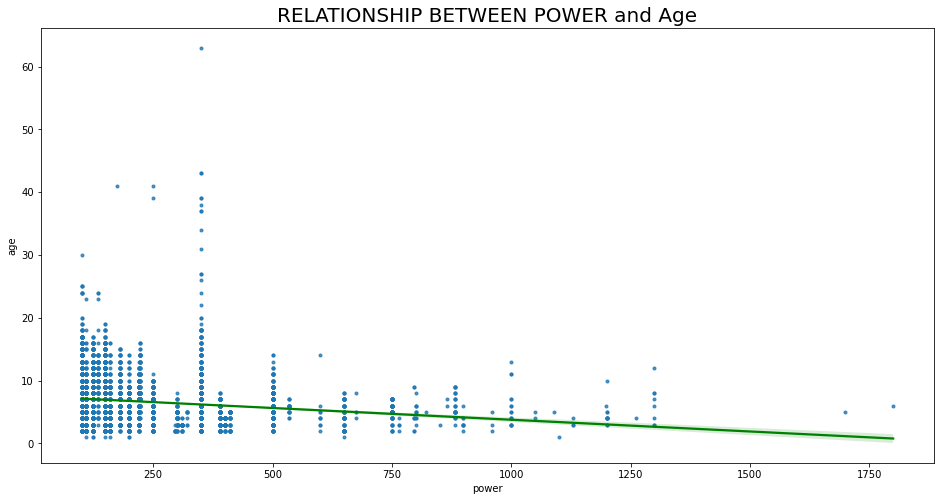

In [31]:
#The plot explains relation between power and age
plt.figure(figsize=[16,8])
sns.regplot(bikes['power'],bikes['age'],line_kws={"color": "green"},marker='.')
plt.title("RELATIONSHIP BETWEEN POWER and Age",fontdict={'color':'black','fontsize':20})

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Power')]

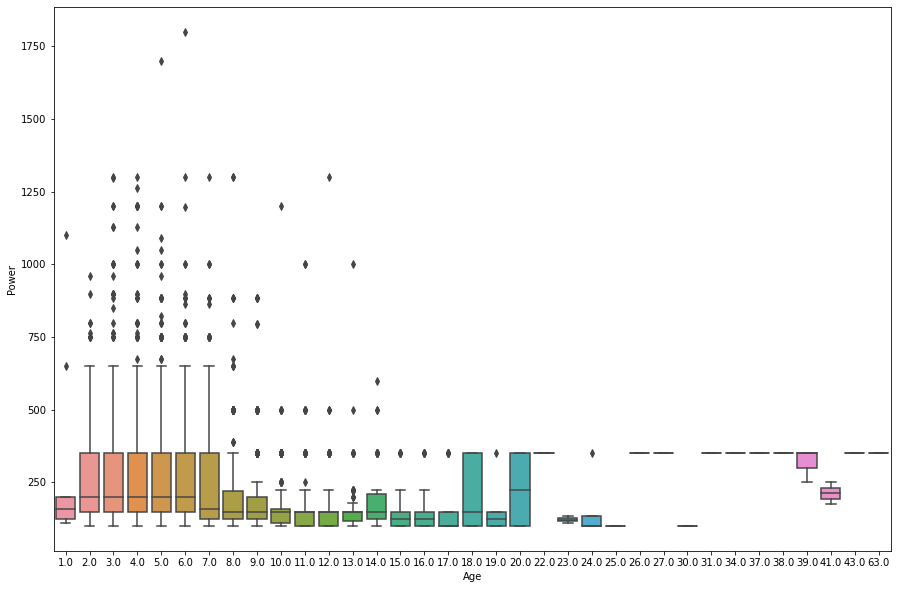

In [32]:
#box plot of power vs age 
plt.figure(figsize = (15,10))
sns.boxplot(x='age',y='power',data=bikes).set(xlabel='Age',ylabel='Power')

#### With increse in age we see reduction in power.
#### This can be interpreted to the fact that old bikes have low power engines and with time new bikes with more power were invented

# Relation with Kms Driven

Text(0.5, 1.0, 'Price vs Kms Driven')

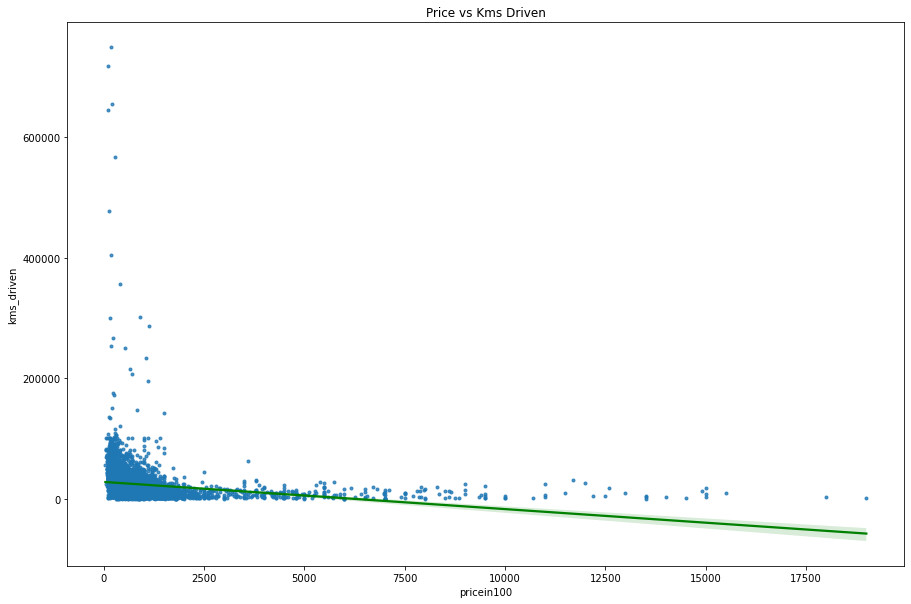

In [33]:
#Plot of Price vs Kms Driven
plt.figure(figsize = (15,10))
sns.regplot(bikes['pricein100'],bikes['kms_driven'],line_kws={"color": "green"},marker='.')
plt.title('Price vs Kms Driven',fontdict={'color':'black','size':12})

Text(0.5, 1.0, 'Power vs Kms Driven')

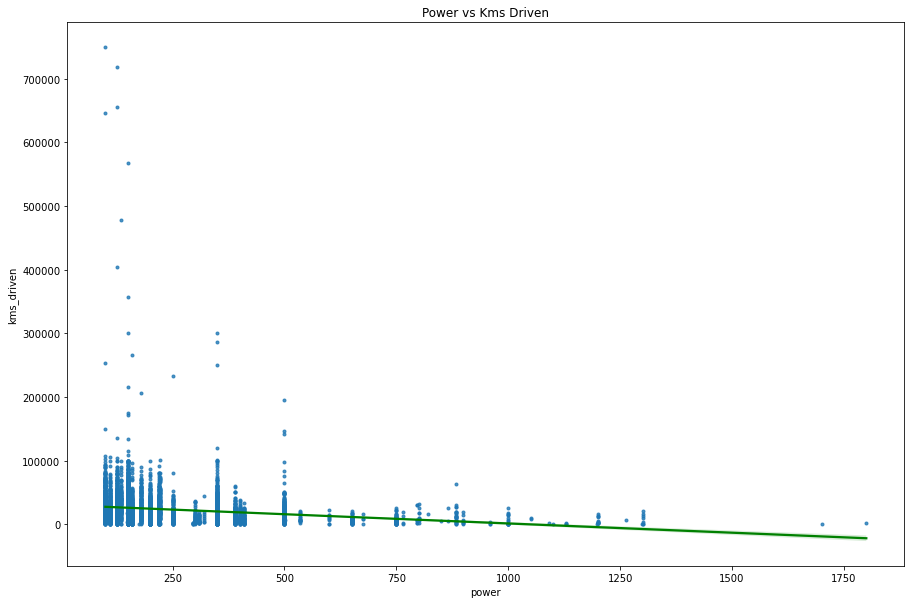

In [34]:
#Plot of Power vs Kms Driven
plt.figure(figsize = (15,10))
sns.regplot(bikes['power'],bikes['kms_driven'],line_kws={"color": "green"},marker='.')
plt.title('Power vs Kms Driven',fontdict={'color':'black','size':12})

<AxesSubplot:title={'center':'Age vs Kms_driven'}, xlabel='age', ylabel='kms_driven'>

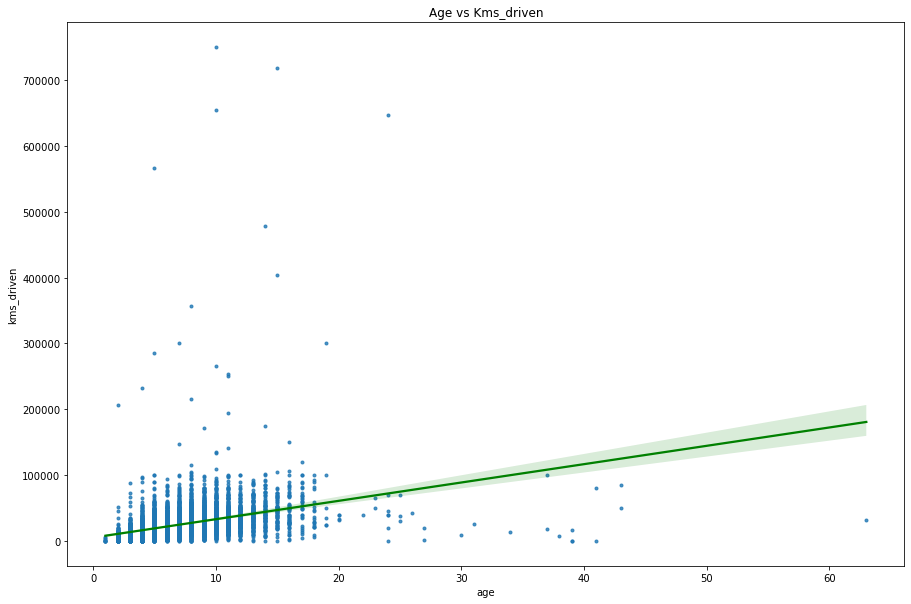

In [35]:
#Plot of Age vs Kms Driven
plt.figure(figsize = (15,10))
plt.title('Age vs Kms_driven',fontdict={'color':'black','size':12})
sns.regplot(bikes['age'],bikes['kms_driven'],line_kws={"color": "green"},marker='.')

#### 1.Old bikes have travelled less kms than new ones because they were not so efficient and long lasting. 
#### 2.Bikes that are 5-10 year old have travelled most as they are consistent and pocket friendly
#### 3.Bikes with less power have travelled more and number of kms driven changes with increase in power.
#### 4.Bikes with less power are less fuel consuming and so they are most commonly used while more power bikes are used in races or for a collection so they travel less.
#### 5.With increase in price number of kms travelled reduces.
#### 6.Cheap bikes are mostly used to travel by common people in india . Its their means of transport which is the reason why they have travelled more.
#### 7.Expensive/Costly bikes are mostly used either for races or as a collection which is the reason they travel less.

## Correlation amongst Variables

In [36]:
#Correlation matrix
corri=bikes.corr()
corri

,kms_driven,age,power,pricein100
kms_driven,1.000000,0.367518,-0.168295,-0.199951
age,0.367518,1.000000,-0.164211,-0.248752
power,-0.168295,-0.164211,1.000000,0.807641
pricein100,-0.199951,-0.248752,0.807641,1.000000


<AxesSubplot:>

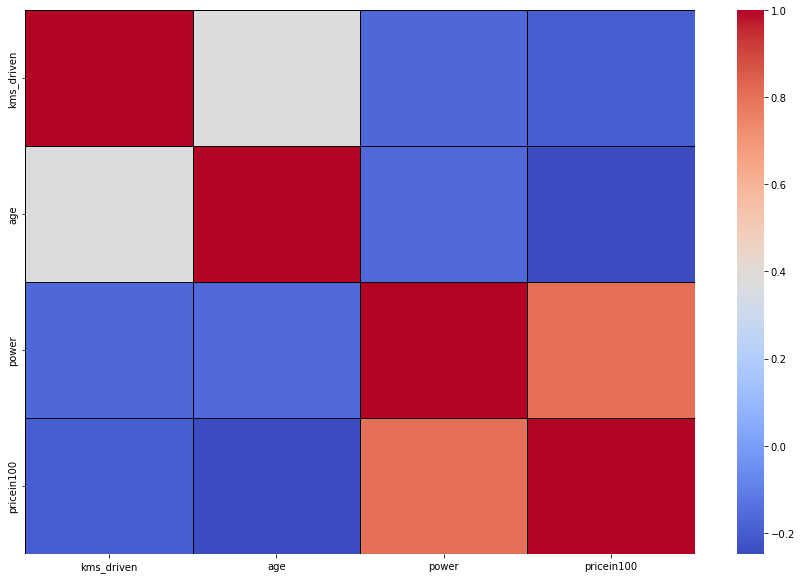

In [37]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corri,linewidths=1,linecolor='black',cmap='coolwarm')

#### 1. Power and Price are positive and highly correlated .
#### 2. Kms Driven and age are positively and somewhat correlated.
#### 3. Price and age are negatively and somewhat correlated.

[Text(0.5, 0, 'Price(in 100)'), Text(0, 0.5, 'Type of Owner')]

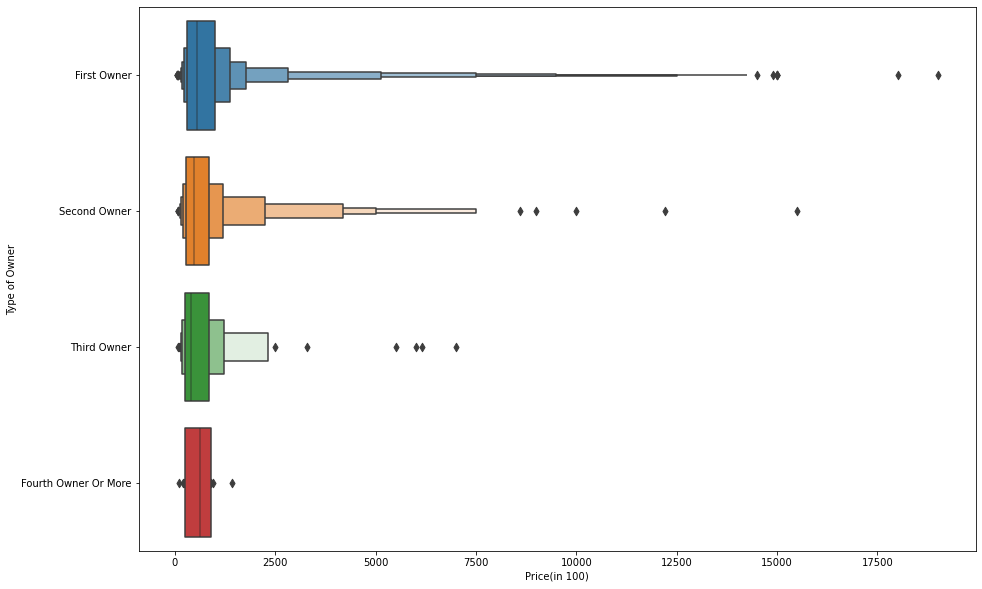

In [38]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="pricein100",y="owner",data=bikes).set(xlabel='Price(in 100)',ylabel='Type of Owner')

[Text(0.5, 0, 'Price(in 100)'), Text(0, 0.5, 'KM dirven')]

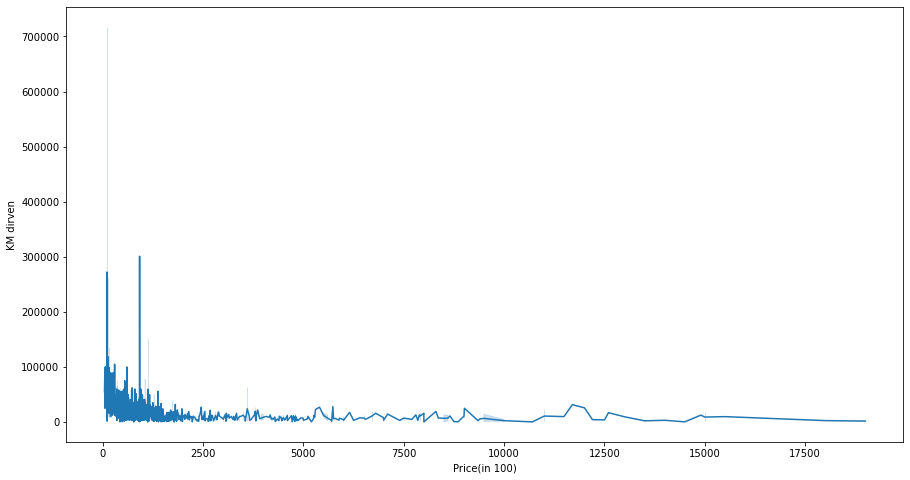

In [39]:
#line plot of price vs kms driven
plt.figure(figsize = (15,8))
sns.lineplot(x="pricein100",y="kms_driven",data=bikes).set(xlabel='Price(in 100)',ylabel='KM dirven')

## Data Preprocessing

In [40]:
#Getting dummies for brands and owners
owner_dummies=pd.get_dummies(bikes.owner)
owner_dummies.head()
brand_dummies=pd.get_dummies(bikes.brand)
brand_dummies.head()

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
merged_bike = pd.concat([bikes,owner_dummies,brand_dummies],axis=1)
merged_bike.head()

,bike_name,city,kms_driven,owner,age,power,brand,pricein100,First Owner,Fourth Owner Or More,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS,350.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,Royal Enfield Classic 350cc,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield,1199.0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Triumph Daytona 675R,Delhi,110.0,First Owner,8.0,675.0,Triumph,6000.0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,TVS Apache RTR 180cc,Bangalore,16329.0,First Owner,4.0,180.0,TVS,650.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha,800.0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
merged_bike.shape

(7324, 35)

In [43]:
#dropping unnecessary columns 
merged_bike.drop(['brand','bike_name','city','owner','Fourth Owner Or More'],axis=1,inplace=True)

In [44]:
#renaming pricein100 to price
rp=merged_bike['pricein100']
merged_bike['price']=rp
merged_bike.drop('pricein100',axis=1,inplace=True)
merged_bike.head()

,kms_driven,age,power,First Owner,Second Owner,Third Owner,BMW,Bajaj,Benelli,Ducati,...,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi,price
0,17654.0,3.0,110.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,350.0
1,11000.0,4.0,350.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1199.0
2,110.0,8.0,675.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,6000.0
3,16329.0,4.0,180.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,650.0
4,10000.0,3.0,150.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,800.0


In [45]:
#dropping brands which are almost negligible in data set
merged_bike.drop(['Rajdoot','LML','Jawa','Indian','Yezdi','Ideal','BMW'],axis=1,inplace=True)

In [46]:
merged_bike.shape

(7324, 23)

In [47]:
#removing the outliers to filter a proper dataset
merged_bike=merged_bike[merged_bike['price']<10000]
merged_bike=merged_bike[merged_bike['age']<15]
merged_bike=merged_bike[merged_bike['power']<1200]
merged_bike=merged_bike[merged_bike['kms_driven']<100000]

In [48]:
merged_bike.head()

,kms_driven,age,power,First Owner,Second Owner,Third Owner,Bajaj,Benelli,Ducati,Harley-Davidson,...,KTM,Kawasaki,MV,Mahindra,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,price
0,17654.0,3.0,110.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,350.0
1,11000.0,4.0,350.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1199.0
2,110.0,8.0,675.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6000.0
3,16329.0,4.0,180.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,650.0
4,10000.0,3.0,150.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,800.0


In [49]:
merged_bike.shape

(7040, 23)

In [50]:
merged_bike.describe()

,kms_driven,age,power,First Owner,Second Owner,Third Owner,Bajaj,Benelli,Ducati,Harley-Davidson,...,KTM,Kawasaki,MV,Mahindra,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,price
count,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,...,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000
mean,22168.271165,6.297017,225.178267,0.912500,0.076847,0.009659,0.285938,0.006534,0.001420,0.012216,...,0.053125,0.008523,0.000142,0.007102,0.183523,0.027699,0.066335,0.002131,0.090909,810.153869
std,16609.111579,2.800309,144.909116,0.282586,0.266367,0.097812,0.451892,0.080575,0.037665,0.109856,...,0.224299,0.091931,0.011918,0.083981,0.387122,0.164120,0.248885,0.046113,0.287500,919.958187
min,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000
25%,10000.000000,4.000000,125.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,319.750000
50%,18375.500000,6.000000,160.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
75%,29892.500000,8.000000,350.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
max,99999.000000,14.000000,1198.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9500.000000


In [51]:
merged_bike.columns

Index(['kms_driven', 'age', 'power', 'First Owner', 'Second Owner',
       'Third Owner', 'Bajaj', 'Benelli', 'Ducati', 'Harley-Davidson', 'Hero',
       'Honda', 'Hyosung', 'KTM', 'Kawasaki', 'MV', 'Mahindra',
       'Royal Enfield', 'Suzuki', 'TVS', 'Triumph', 'Yamaha', 'price'],
      dtype='object')

### Visualization after Filtering Data

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Price(in 100)')]

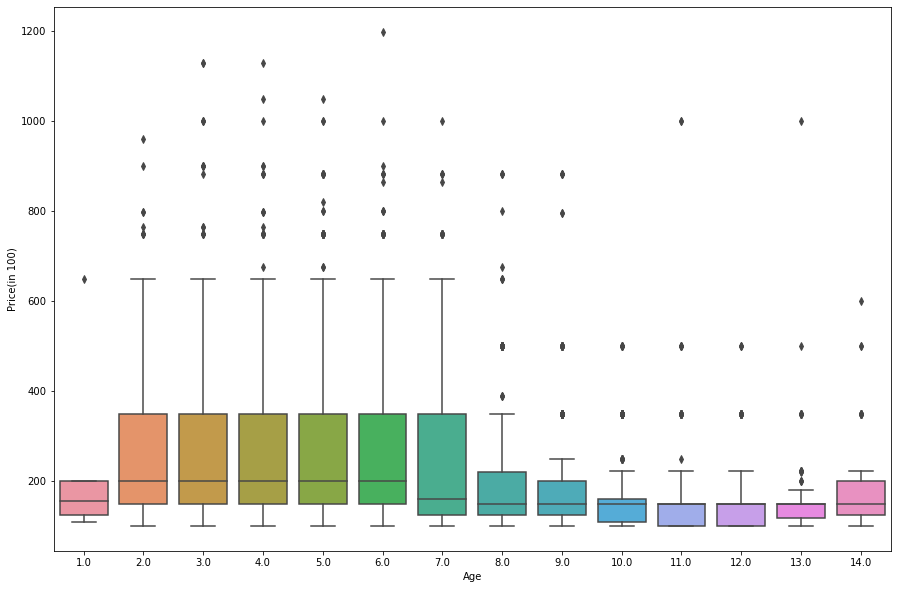

In [52]:
plt.figure(figsize = (15,10))
sns.boxplot(x='age',y='power',data=merged_bike).set(xlabel='Age',ylabel='Price(in 100)')

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN POWER and Age')

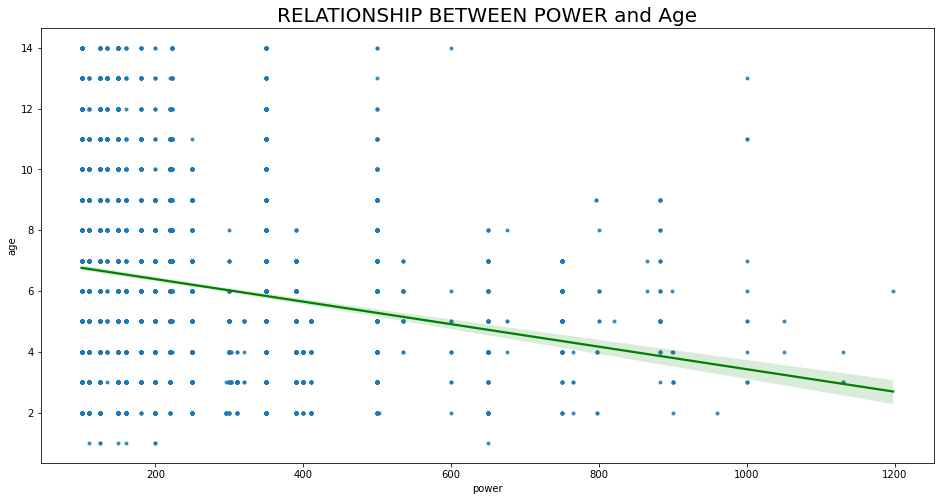

In [53]:
plt.figure(figsize=[16,8])
sns.regplot(merged_bike['power'],merged_bike['age'],line_kws={"color": "green"},marker='.')
plt.title("RELATIONSHIP BETWEEN POWER and Age",fontdict={'color':'black','fontsize':20})

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN PRICE AND AGE')

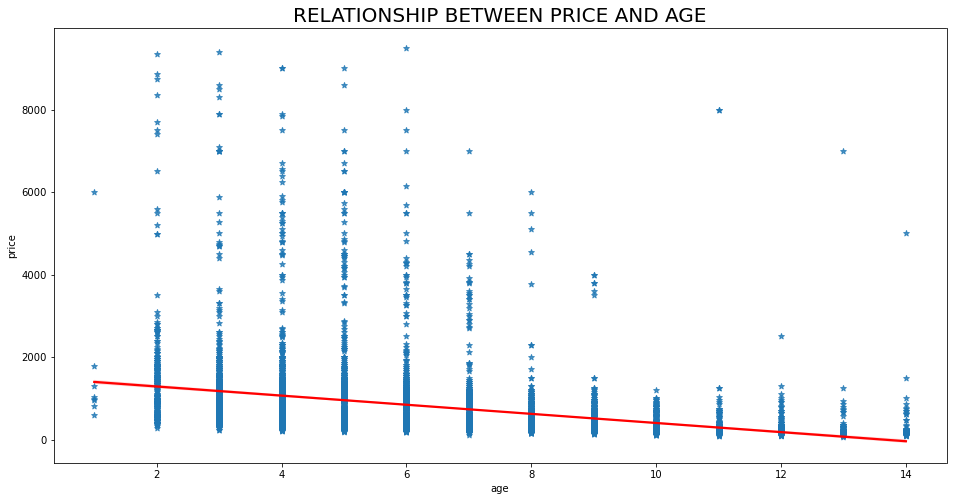

In [54]:
plt.figure(figsize=[16,8])
sns.regplot(merged_bike['age'],merged_bike['price'],line_kws={"color": "red"},marker='*')
plt.title("RELATIONSHIP BETWEEN PRICE AND AGE",fontdict={'color':'black','fontsize':20})

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN PRICE AND POWER')

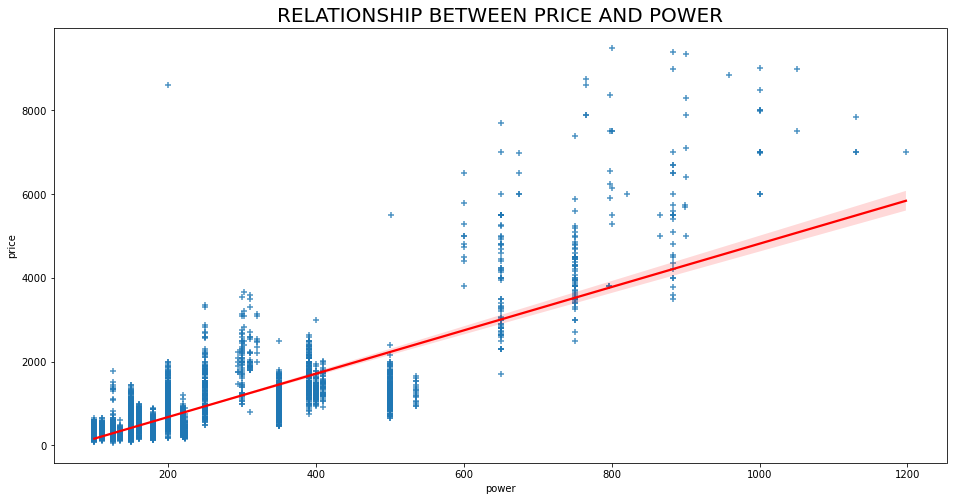

In [55]:
plt.figure(figsize=[16,8])
sns.regplot(merged_bike['power'],merged_bike['price'],line_kws={"color": "red"},marker='+')
plt.title("RELATIONSHIP BETWEEN PRICE AND POWER",fontdict={'color':'black','fontsize':20})

### Splitting the Dataset into training and testing dataset

In [56]:
#Independent variables are atored in x and dependent feature(price) stored in y
x=merged_bike.iloc[:,:-1]
y=merged_bike.iloc[:,-1]

In [57]:
#Splitting into training and testing dataset
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=5)  

In [58]:
#Defining the regression model
regression = LinearRegression()
regression.fit(x_train,y_train)
print('Training Complete')

Training Complete


In [59]:
#testing dataset after defining a model
pred=regression.predict(x_test)
pred

array([1266.78625538,  538.38856084,  -78.28769568, ...,  638.23497465,
       2044.13544248, 1060.4140804 ])

In [60]:
#finding out the accuracy of our regression model
accuracy=(regression.score(x_test,y_test))*100
print('Model Accuracy:', accuracy)


Model Accuracy: 90.04351862154513


In [61]:
# Finding MAE and MSE
print('Mean Absolute Error:' ,
      metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, pred)) 

Mean Absolute Error: 179.2418462018757
Mean Squared Error: 81670.58566336584


In [62]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9004351862154513

In [63]:
df= pd.DataFrame({'RealData':y_test, 'PredictedData':pred})
df

,RealData,PredictedData
2259,1200.0,1266.786255
2490,350.0,538.388561
4244,190.0,-78.287696
6379,1140.0,1613.947617
6373,420.0,495.564883
...,...,...
1553,800.0,678.622766
3276,600.0,559.345618
1861,900.0,638.234975
8606,2504.3,2044.135442


## Findings
#### 1.The accuracy of our linear regression model is 90%.
#### 2.The model performs well.
#### 3. The MSE is 81670.58 and MAE is 179.241 which is not much but can be further reduced.

### Now we try to improve out model by using decision tree regression in place of linear regressor

In [64]:
#defining Decision tree model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [65]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2,random_state=5)  

In [66]:
dt.fit(x_train,y_train)
print('Training Complete')

Training Complete


In [67]:
pred=dt.predict(x_test)
pred

array([1250.,  650.,  230., ...,  750., 2125., 1100.])

In [68]:
accuracy=(dt.score(x_test,y_test))*100
print('Model Accuracy:', accuracy,"%")
print(r2_score(y_test,pred))

Model Accuracy: 93.36241605751093 %
0.9336241605751092


In [69]:
print('Mean Absolute Error:' ,
      metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, pred)) 

Mean Absolute Error: 145.30567471590908
Mean Squared Error: 54446.480374672516


In [70]:
df= pd.DataFrame({'RealData':y_test, 'PredictedData':pred})
df

,RealData,PredictedData
2259,1200.0,1250.0
2490,350.0,650.0
4244,190.0,230.0
6379,1140.0,1020.0
6373,420.0,426.3
...,...,...
1553,800.0,800.0
3276,600.0,550.0
1861,900.0,750.0
8606,2504.3,2125.0


## Findings

#### 1. The accuracy of the model is 93.36%
#### 2. Model performs better than the linear regression model.
#### 3. The MSE is 54446.48 and MAE is 145.30 which is a good improvement in comparison to previous model.


## ##Disclaimer- All predicted values are price in hundred!

# Summary

#### 1. Our aim to predict price of used bikes is completed.
#### 2. Data has been properly analysed and visualized.
#### 3. India is a populous and developing country which is the reason why people prefer bikes more and that too with less cost.
#### 3. Expensive bikes are rarely bought in the country , and if bought are rarely used to travel.
#### 4. People with financial issues mostly pass thier bikes to the next generation and use it until it lasts and is in working condition.
#### 5. Indians prefer repairing than buying a new one.
#### 6. Our Decision tree model performs better than the Linear Regression maybe because of non linearity between some of the variables.

# THANK YOU!